# GRIP - Task 4 - Decision Trees  
## By Bhaskar B Sarkar

#### Importing Libraries 

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing Iris dataset from sklearn.datasets package

In [115]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

#### Creating dataframe for iris

In [116]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target
df['Species Name'] = df['Species'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Species Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### Let's visualize data before training


Text(0, 0.5, 'Number of Samples')

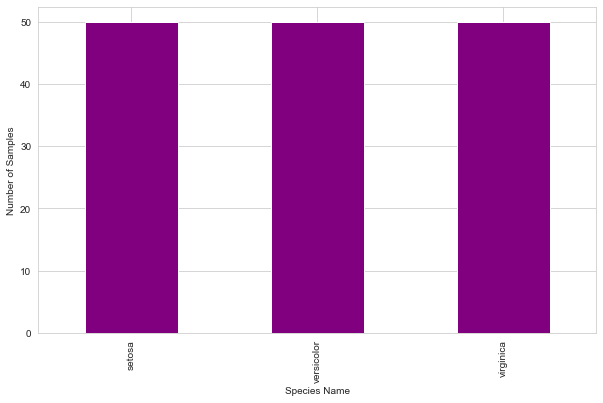

In [117]:
plt.figure(figsize=(10,6))
df.groupby('Species Name').count()['Species'].plot(kind='bar', color='purple')
plt.ylabel('Number of Samples')

#### We can see that we have equal number of data values for each category
#### Now, lets plot the data points for different categories

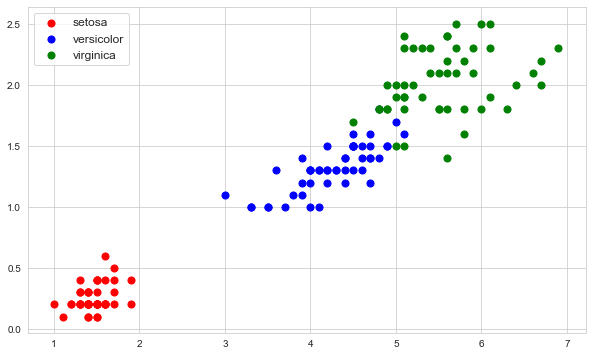

In [118]:
df0 = df[df.Species == 0]
df1 = df[df.Species == 1]
df2 = df[df.Species == 2]

plt.figure(figsize=(10,6))
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', label=iris.target_names[0], s=50)
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', label=iris.target_names[1], s=50)
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green', label=iris.target_names[2], s=50)
plt.legend(fontsize ='large')

#### Let's divide the data features and variables.

In [119]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
y = df['Species']

#### Let's create and train the model

In [120]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Let's visualize the tree

In [121]:
from sklearn import tree

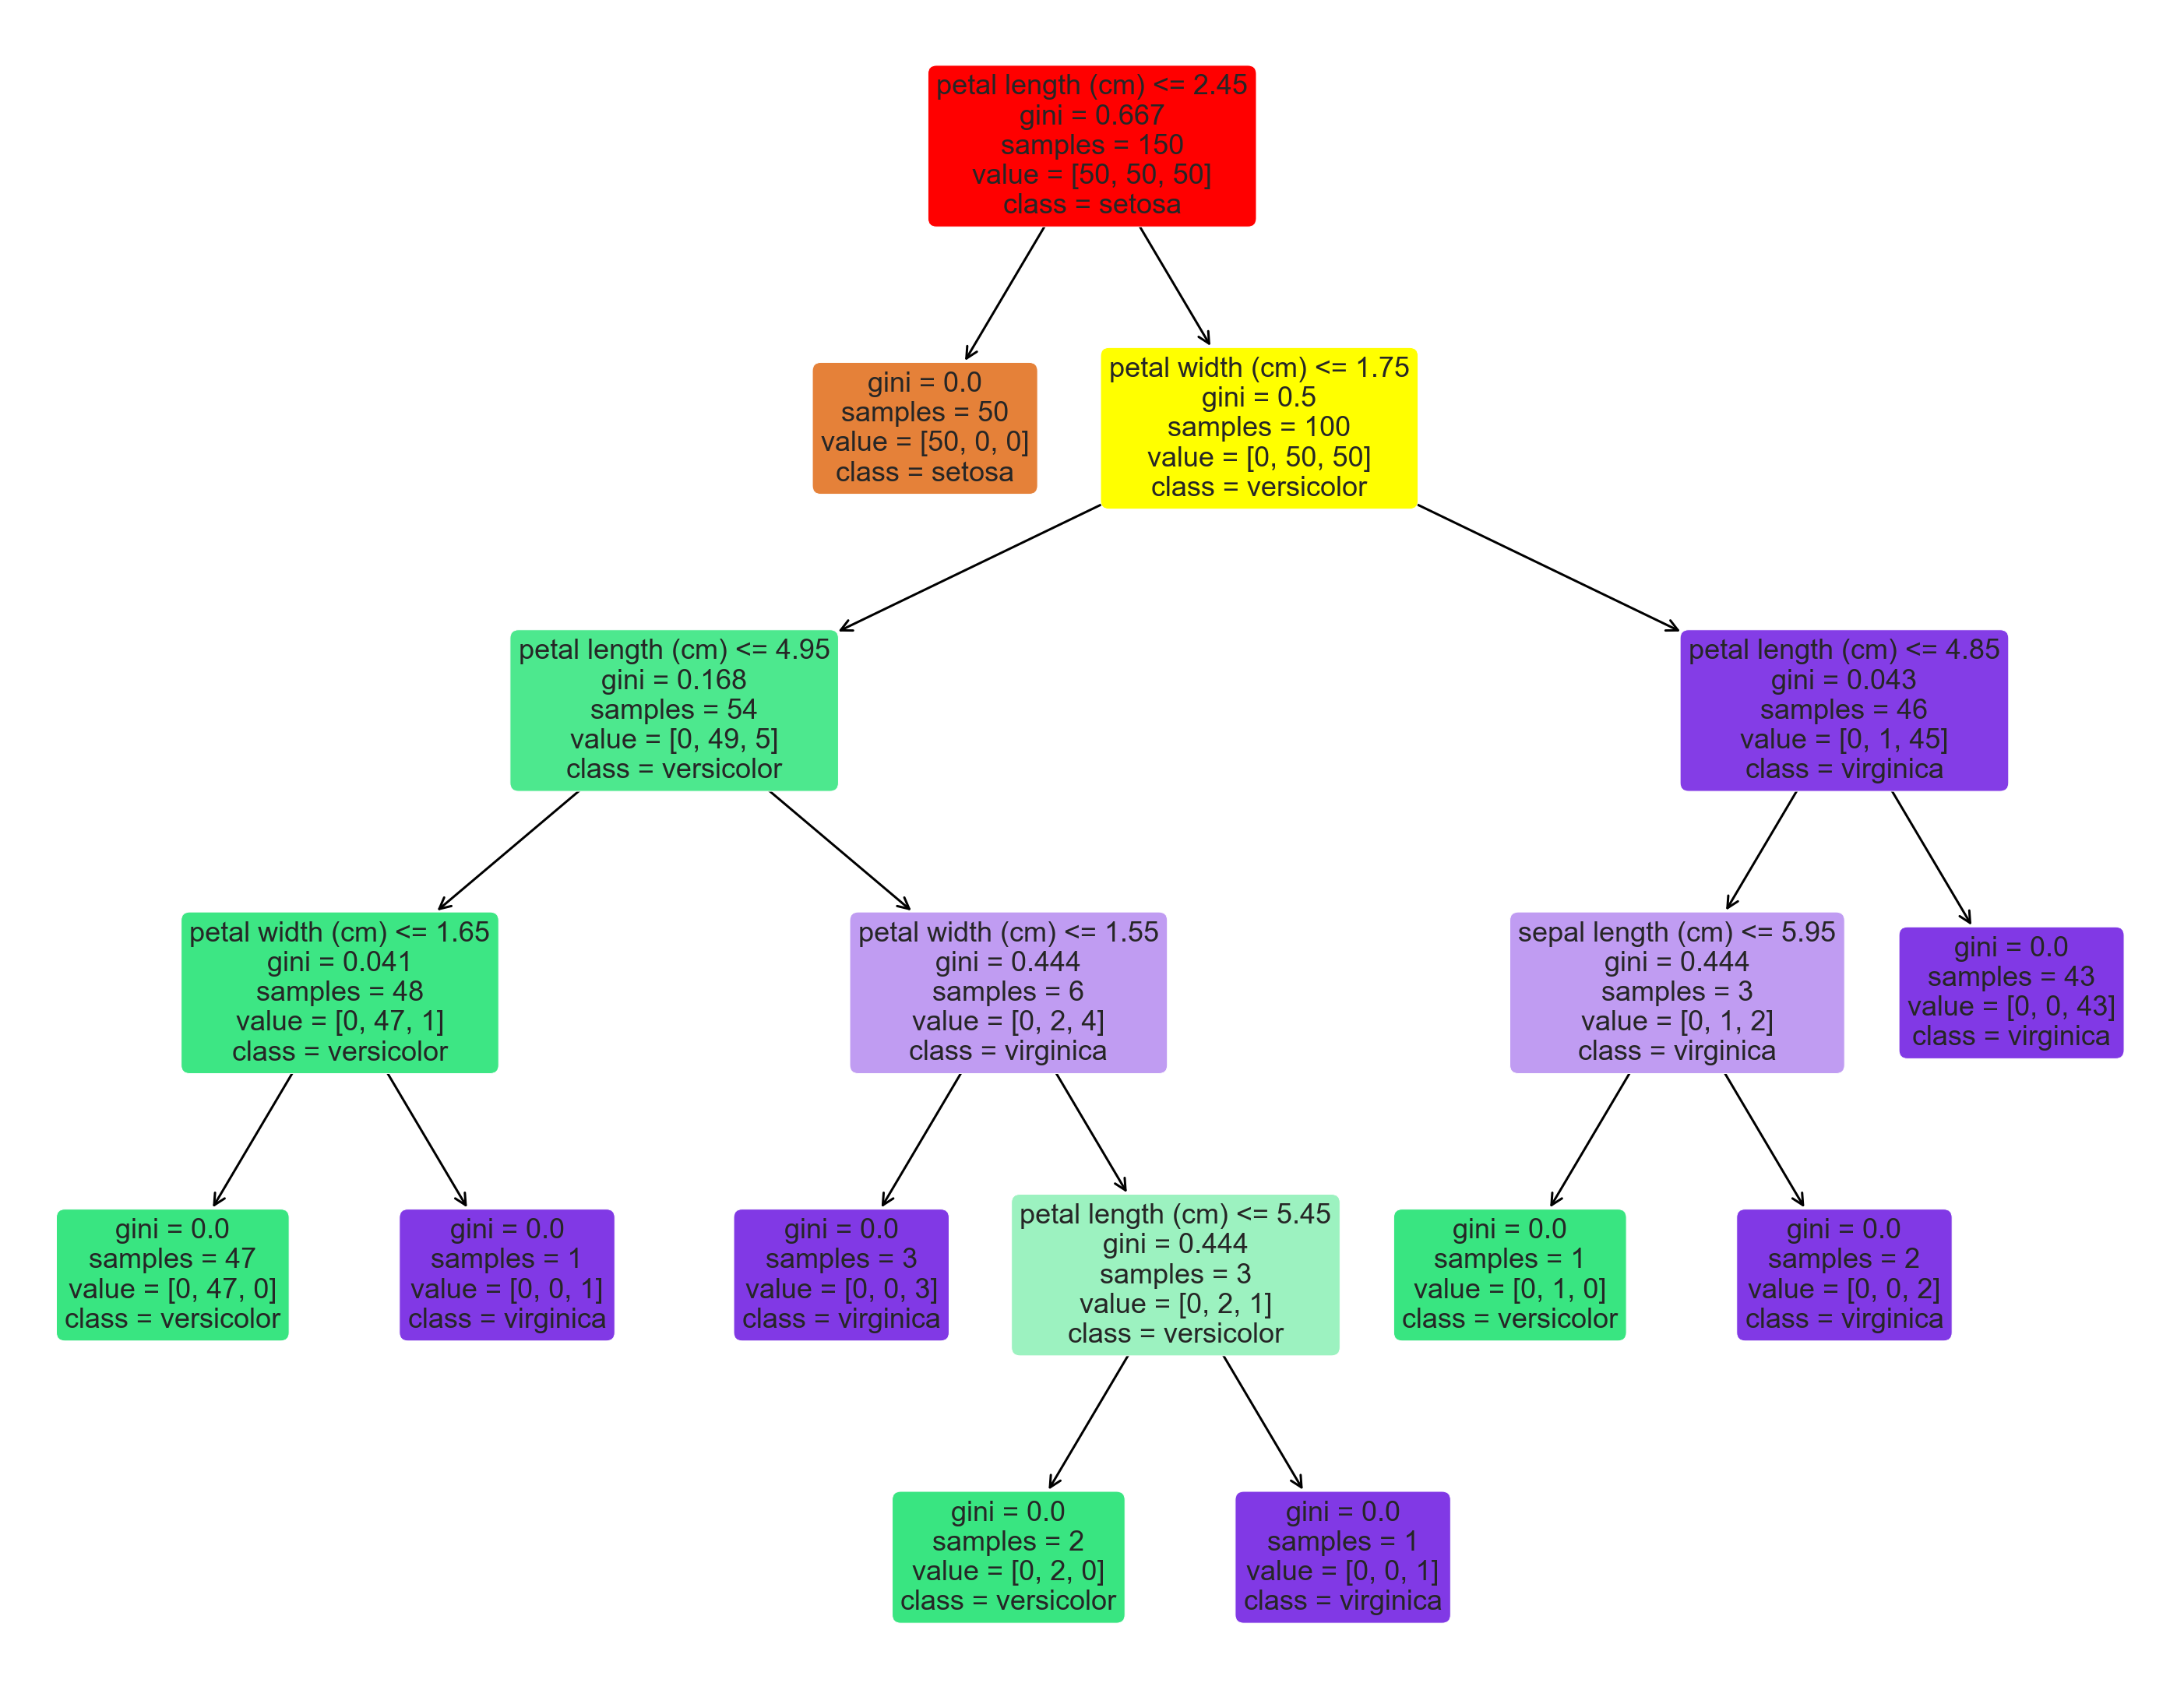

In [160]:
fig, ax = plt.subplots(figsize=(50, 40))
out = tree.plot_tree(model,
                  feature_names=iris.feature_names,
                  class_names=iris.target_names,
                  rounded=True,
                  filled=True, 
                  rotate=True, ax=ax,
                  )
i = 0
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
    if i == 0:
        o.set_backgroundcolor('red')
    if i == 2:
        o.set_backgroundcolor('yellow')
    i+=1   
